In [2]:
from data.image_dataset import ImageDataset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset


dataset = ImageDataset('../datasets/UNet_train/', transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]))

# sub = Subset(dataset, range(100))

dataloader = DataLoader(dataset, batch_size=16, shuffle=True,
                        num_workers=16, prefetch_factor=2)

In [1]:
from model.unet.facediffusion_unet import FaceDiffusionUNet
from model.unet.blocks.time_embedding import encode_timesteps
import torch
import matplotlib.pyplot as plt
from torchinfo import summary

model = FaceDiffusionUNet().cuda()

summary(model)

Layer (type:depth-idx)                             Param #
FaceDiffusionUNet                                  --
├─TimeEmbedding: 1-1                               --
│    └─Linear: 2-1                                 410,880
│    └─Linear: 2-2                                 1,639,680
├─UNet: 1-2                                        --
│    └─ModuleList: 2-3                             --
│    │    └─SwitchSequential: 3-1                  2,240
│    │    └─SwitchSequential: 3-2                  334,800
│    │    └─SwitchSequential: 3-3                  334,800
│    │    └─SwitchSequential: 3-4                  57,680
│    │    └─SwitchSequential: 3-5                  1,028,000
│    │    └─SwitchSequential: 3-6                  1,130,400
│    │    └─SwitchSequential: 3-7                  230,560
│    │    └─SwitchSequential: 3-8                  3,694,400
│    │    └─SwitchSequential: 3-9                  4,104,000
│    │    └─SwitchSequential: 3-10                 921,920
│    │    

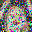

In [ ]:
from diffusers import DDPMScheduler
from PIL import Image

sample_image = dataset[0]
noise_scheduler = DDPMScheduler(1000)
latent = 
noise = torch.randn(sample_image.shape)
noisy_image = noise_scheduler.add_noise(
    sample_image, noise, timesteps=torch.LongTensor([100]))

Image.fromarray(((noisy_image.unsqueeze(0).permute(0, 2, 3, 1) + 1.0)
                * 127.5).type(torch.uint8).numpy()[0])

In [15]:
from torch.optim import Adam
from torch.nn import MSELoss
from diffusers import get_cosine_schedule_with_warmup

epochs = 50
optimizer = Adam(model.parameters(), lr=1e-4)
lr_scheduler = get_cosine_schedule_with_warmup(optimizer, num_warmup_steps=500, num_training_steps=len(dataloader) * epochs)
criterion = MSELoss()

In [16]:
from pipelines.unet_training import UNetTrainingPipeline

pipeline = UNetTrainingPipeline(
    unet=model,
    vae=None,
    dataloader=dataloader
)

pipeline.train('basic-test', '../runs/', 50,
               optimizer=optimizer, lr_scheduler=lr_scheduler)

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "/usr/lib/python3.12/multiprocessing/queues.py", line 259, in _feed
    reader_close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.12/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:03<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

  0%|          | 0/788 [00:00<?, ?it/s]

[+] Training stopped. Results saved to ../runs/basic-test


  0%|          | 0/30 [00:00<?, ?it/s]

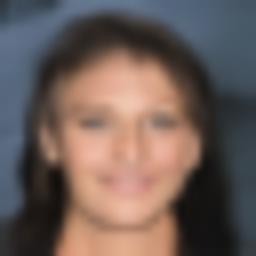

In [204]:
from diffusers.schedulers import DPMSolverSinglestepScheduler, EulerDiscreteScheduler, DPMSolverMultistepScheduler, DDPMScheduler
from model.facediffusion_unet import FaceDiffusionUNet
from model.unet.blocks.time_embedding import encode_timesteps
from tqdm.auto import tqdm
from data.utils import tensor_to_images
import torch

# scheduler = DPMSolverSinglestepScheduler(
#     1000, solver_order=3, lower_order_final=True, use_karras_sigmas=True)
# scheduler = DPMSolverMultistepScheduler(1000, solver_order=3, use_karras_sigmas=True)
scheduler = DDPMScheduler(1000)
scheduler.set_timesteps(30)
images = torch.normal(0, 1, (1, 3, 32, 32)).cuda()
model = FaceDiffusionUNet().cuda()
state_dict = torch.load('../runs/basic-test/checkpoint.safetensors')
model.load_state_dict(state_dict)

model.eval()
with torch.no_grad():
    for t in tqdm(scheduler.timesteps):
        pred_noise = model(images, encode_timesteps(torch.Tensor([t])).cuda())
        scheduler.scale_model_input(images, t)
        images = scheduler.step(pred_noise, t, images).prev_sample

imgs = tensor_to_images(images)
imgs[0].resize((256, 256))

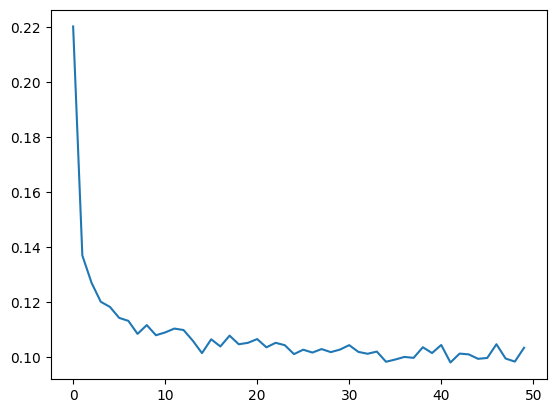

In [1]:
import matplotlib.pyplot as plt
import json

with open('../runs/unet_vae/loss.json') as f:
    loss = json.load(f)

plt.plot(loss)